<a href="https://colab.research.google.com/github/Mgobeaalcoba/padawan_python_course/blob/main/6_Regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Regresiones
#### 1. Regresión lineal:
Es uno de los <b>métodos más simples</b> y ampliamente utilizados. Se utiliza para encontrar la relación lineal entre una variable dependiente y una o varias variables independientes. Es útil para predecir valores continuos y cuando la relación entre las variables es lineal.
#### 2. Regresión logística:
Es una técnica de regresión utilizada para problemas de clasificación <b>binaria</b>. Se utiliza para encontrar la probabilidad de un evento dado un conjunto de características. Es útil para predecir la probabilidad de un evento binario (por ejemplo, si un cliente comprará un producto o no) y para modelar relaciones no lineales entre las variables.
#### 3. Regresión polinómica:
Es una extensión de la regresión lineal, donde se utiliza un polinomio para modelar la relación entre las variables. Es útil cuando la relación entre las variables <b>no es lineal</b>, pero sigue un patrón polinómico.

## 1. Regresion Lineal
La función linear_regression realiza una regresión lineal entre dos variables en el dataframe df y utiliza la librería statsmodels para mostrar un resumen del modelo. El resumen incluye los coeficientes de la recta de regresión, el coeficiente de determinación (R-squared), los valores p para cada variable independiente y una tabla de resumen del modelo. También se genera un gráfico de dispersión con la recta de regresión. Es importante tener en cuenta que la regresión lineal asume que la relación entre las dos variables es lineal.

In [ ]:
# @title Libraries

## DataFrames & Statistics
import pandas as pd
import numpy as np

## Charts
import matplotlib.pyplot as plt
import seaborn as sns

## Regression
import scipy.stats as stats

In [ ]:
# @title Create DataFrame step
df = pd.read_csv('https://www.dropbox.com/s/4jgheggd1dak5pw/data_visualization.csv?raw=1', index_col=0)
df['args'] = np.random.choice([0, 1],size=len(df.index))
df.sample(10)

,arrow,under,interior,theta,amb,slice,delta,pi,height,nu,night,dataset,length,twi,x,wind,y,rho,alpha,args
56,4671.129512,0.107687,6.366312e+08,30288.723322,329.712448,560.667620,-2.385313,5910.885695,4.181936e+04,2.052230e+07,11.884511,2001.646491,-0.218137,745.377276,10.218771,7499.322283,-19.546600,2.295524e+20,842.487812,1
573,6437.811565,0.083505,2.420105e+10,43244.076956,1.412863,5634.025837,-106.466450,6922.923196,4.097538e+06,3.327911e+07,12.137341,2581.070476,1.715984,693.491312,10.656523,10350.447114,-28.071331,8.694881e+21,515.847831,0
417,3894.672859,-0.216931,1.669674e+12,30780.133288,495.429749,7904.045956,-147.190998,3388.125547,8.114989e+06,3.662103e+07,11.651969,10706.174983,-0.317436,645.234691,12.668427,6255.195084,-65.134476,4.899793e+18,334.606029,1
705,2689.699790,0.487477,1.848098e+11,32522.404983,336.375414,9367.251696,-8.306360,8022.963958,1.139728e+07,2.164421e+07,5.849667,4174.486433,-1.143448,1433.827597,12.353959,4319.886108,-39.488993,1.456072e+21,451.851401,1
849,3121.939586,-1.795604,5.445348e+11,36364.337440,228.954059,5784.448857,43.683758,12745.805629,4.328871e+06,3.144050e+07,9.700191,6373.663828,-0.789725,945.389112,9.996857,4993.788341,2.994133,1.266792e+23,326.198210,1
46,6508.896774,0.206067,7.725312e+10,30958.827821,200.212727,3487.079098,74.126634,6292.233159,1.590677e+06,2.377060e+07,6.196241,750.617434,1.023820,1087.219383,10.384193,10454.124381,-21.324021,7.951929e+22,153.449768,0
438,4850.560230,-0.976940,5.981310e+11,41323.110727,394.514389,8874.958176,-73.125124,3212.119025,1.024650e+07,4.661793e+07,8.912781,10297.944449,-0.497553,1046.334212,8.681402,7775.794994,-22.544123,5.604227e+17,694.333853,1
603,10307.738665,-0.215822,2.054185e+10,11793.839170,488.650063,9052.730836,-19.030146,12613.800738,1.060822e+07,2.505853e+07,13.724963,6874.075451,0.272721,902.262432,10.339600,16553.803565,-61.850799,5.079149e+21,762.020847,0
10,4271.986157,0.390038,4.337493e+11,34800.760277,22.946349,7917.720776,17.940582,1877.402900,8.140013e+06,4.719996e+07,11.263151,3845.268260,1.710842,697.236116,11.620727,6842.699595,28.879476,9.041777e+20,282.407744,0
777,265.066620,-1.824454,5.460908e+11,44628.959586,402.349640,6686.986977,-63.116827,220.008152,5.778360e+06,3.288777e+07,11.619749,1000.823246,0.343631,1478.495758,12.017296,414.709066,-83.926299,2.375374e+22,580.708859,1


In [ ]:
# @title Set auxiliaries variables
x = 'height'
y = 'slice'
category = 'args'

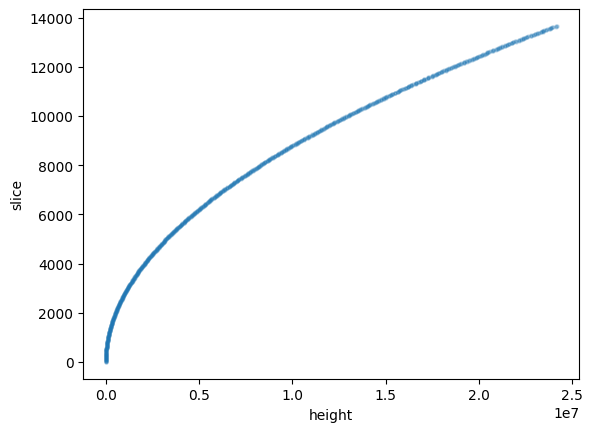

In [ ]:
# @title Scaterplot Matplotlib

## Construyo mi Scatterplot
plt.scatter(x = df[x],
            y = df[y],
            s=5,
            alpha=0.2)

## Seteo el nombre de los ejes:
plt.xlabel(x)
plt.ylabel(y)

## Muestro el gráfico
plt.show()

In [ ]:
# @title Linear Regression
slope, intercept, r_value, p_value, std_err = stats.linregress(df[x], df[y])

In [ ]:
#Imprimir los resultados
print("Slope: ", slope)
print("Intercept: ", intercept)
print("R-squared: ", r_value**2)
print("P-value: ", p_value)

Slope:  0.000530350455231901
Intercept:  2551.7210652529757
R-squared:  0.9377388298739596
P-value:  0.0


#### Leamos juntos estos resultados:

1. **Slope (Pendiente)**: La pendiente es aproximadamente 0.0005304. Esto significa que, en promedio, por cada unidad adicional en la variable independiente (X), la variable dependiente (Y) aumenta en 0.0005304 unidades. Esta pendiente positiva indica una relación positiva entre las dos variables, lo que sugiere que a medida que X aumenta, Y tiende a aumentar.

2. **Intercept (Intercepto)**: El intercepto es aproximadamente 2551.7211. Esto significa que cuando la variable independiente (X) es igual a cero, se estima que la variable dependiente (Y) tiene un valor de aproximadamente 2551.7211.

3. **R-squared (R-cuadrado)**: El valor R-cuadrado es aproximadamente 0.9377. Esto indica que aproximadamente el 93.77% de la variabilidad en la variable dependiente (Y) se explica por la variabilidad en la variable independiente (X). En otras palabras, la línea de regresión se ajusta muy bien a tus datos y explica la mayoría de la variación en Y.

4. **P-value (Valor p)**: El valor p es igual a 0. Esto significa que la relación entre X e Y es estadísticamente significativa. En otras palabras, es altamente improbable que la relación observada sea el resultado del azar. La relación entre las variables es muy sólida desde una perspectiva estadística.

**Veamos esto con un gráfico**

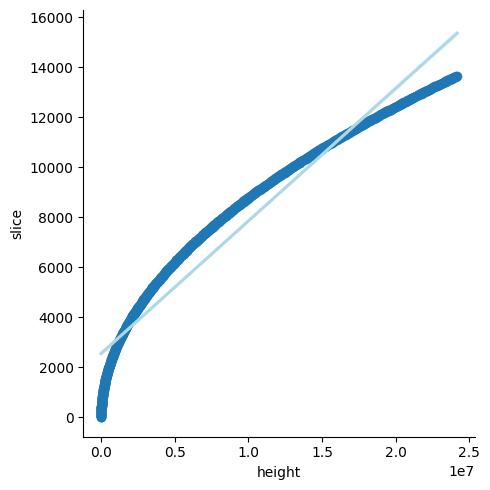

In [ ]:
# @title Lmplot with regression

## Armamos el lmplot y le solicitamos que marque la linea de regresión
sns.lmplot(x=x,
           y=y,
           data=df,
           line_kws={'color': 'lightblue'})

## Mostramos el gráfico
plt.show()

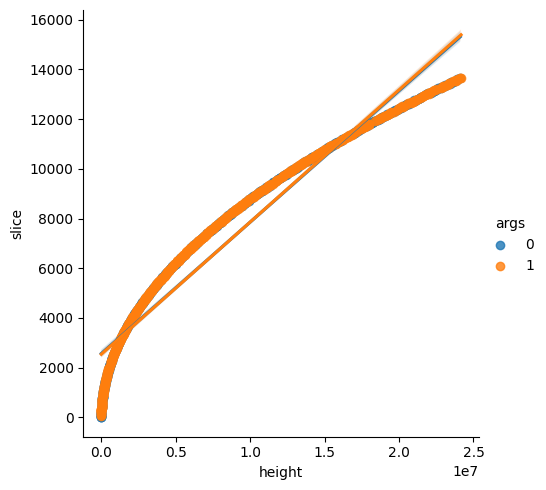

In [ ]:
# @title Lmplot with regression line and open by "args"

## Selecciono la columna por la que voy a dividir mi gráfico en colores
segmento = "args" # Columna generada al hacer para dividir mi población de forma aleatoria

## Genero Grafico con apertura por segmento
sns.lmplot(x=x,
           y=y,
           data=df,
           hue=segmento)

## Muestro el gráfico
plt.show()

## 2. Regresion Logistica
La función logistic_regression realiza una regresión logística entre varias variables en el dataframe df y muestra los coeficientes de la regresión, el coeficiente de determinación (R-squared), el valor p y otros parámetros estadísticos. Es importante tener en cuenta que esta regresión asume que la relación entre las varias variables es lineal, y que los datos no contengan valores nulos o infinitos.
Es importante notar que el variable dependiente (y) tiene que ser una variable dicotómica (binaria/booleana) para que la regresión logística tenga sentido.

In [ ]:
# @title Add more libraries
## Regresion
import statsmodels.api as sm

In [ ]:
# @title Create DataFrame step
df2 = pd.read_csv("https://raw.githubusercontent.com/Statology/Python-Guides/main/default.csv")
df2.head()

,default,student,balance,income
0,0,0,729.526495,44361.625074
1,0,1,817.180407,12106.134700
2,0,0,1073.549164,31767.138947
3,0,0,529.250605,35704.493935
4,0,0,785.655883,38463.495879


In [ ]:
# @title Set auxiliaries variables
x = 'balance'
y = 'student'

#### El objetivo será ver que tan probable es que sea estudiante una persona en función de sus ventas.

In [ ]:
# @title Set Logistic Regression

## Selecciono la data que le voy a pasar al modelo
y_data = df2[y]
X_data = sm.add_constant(df2[x])

## Creo mi modelo con la data seleccionada
logit_model = sm.Logit(y_data,X_data)

## Entreno mi modelo
result = logit_model.fit()

## Imprimo los resultados del entrenamiento de mi modelo
print(result.summary2())

Optimization terminated successfully.
         Current function value: 0.585212
         Iterations 5
                         Results: Logit
Model:              Logit            Method:           MLE       
Dependent Variable: student          Pseudo R-squared: 0.034     
Date:               2023-10-08 19:43 AIC:              11708.2407
No. Observations:   10000            BIC:              11722.6613
Df Model:           1                Log-Likelihood:   -5852.1   
Df Residuals:       9998             LL-Null:          -6060.4   
Converged:          1.0000           LLR p-value:      1.3085e-92
No. Iterations:     5.0000           Scale:            1.0000    
------------------------------------------------------------------
              Coef.   Std.Err.     z      P>|z|    [0.025   0.975]
------------------------------------------------------------------
const        -1.7004    0.0488  -34.8607  0.0000  -1.7960  -1.6048
balance       0.0009    0.0000   19.9291  0.0000   0.0008   0.

#### ¿Como se lee el cuadro de arriba y sus principales variables?

1. Modelo y Método:

> * "Model: Logit": Indica que se trata de un modelo de regresión logística.
* "Method: MLE" (Maximum Likelihood Estimation): Indica que el modelo se ajustó utilizando el método de máxima verosimilitud.

2. Variables Dependiente e Independiente:

> * "Dependent Variable: student": Indica que la variable dependiente del modelo es "student" (presumiblemente, si un estudiante es o no estudiante).
* En este caso, parece que se está modelando la probabilidad de que un individuo sea estudiante en función de otra variable que como dijimos arriba es  "balance". Variable independiente.

3. Estadísticas de Ajuste del Modelo:

> * "Pseudo R-squared: 0.034": Representa una medida de la bondad de ajuste del modelo. En este caso, el valor es 0.034, lo que sugiere que el modelo explica aproximadamente el 3.4% de la variabilidad en la variable dependiente.
* "No. Observations: 10000": Indica el número total de observaciones o casos en el conjunto de datos.
* "Df Model: 1" y "Df Residuals: 9998": Representan los grados de libertad del modelo y los grados de libertad residuales, respectivamente.
* "Converged: 1.0000": Indica que el proceso de optimización convergió con éxito al ajustar el modelo.
* "No. Iterations: 5.0000": El número de iteraciones necesarias para que el algoritmo de optimización convergiera.

4. Medidas de Información y Likelihood:

> * "AIC" y "BIC" son criterios de información que se utilizan para comparar modelos. Cuanto más bajo sea el valor, mejor se ajusta el modelo.
* "Log-Likelihood" y "LL-Null" son medidas de cómo se ajusta el modelo en comparación con un modelo nulo (un modelo sin variables independientes). Un valor de Log-Likelihood más alto indica un mejor ajuste del modelo.

5. Resultados de las Variables del Modelo:

> * "Coef.": Los coeficientes estimados para las variables en el modelo. En este caso, hay dos variables: "const" (intercepto) y "balance". El coeficiente estimado para "balance" es 0.0009, lo que sugiere cómo el logaritmo de la odds de ser estudiante cambia en relación con un cambio en "balance". En este caso, un aumento de una unidad en "balance" está asociado con un aumento en la log-odds de ser estudiante en 0.0009 unidades.
* "Std.Err.": Los errores estándar de los coeficientes estimados.
* "z": Las estadísticas z, que indican cuán alejado está cada coeficiente de cero.
* "P>|z|": Los valores p asociados a las estadísticas z, que indican la significancia estadística de cada coeficiente. En este caso, ambos coeficientes tienen valores p muy bajos, lo que sugiere que son estadísticamente significativos.

**En resumen, este cuadro de resultados proporciona información sobre cómo se ajusta el modelo de regresión logística a los datos, la significancia de las variables independientes y las medidas de bondad de ajuste del modelo.**

En base a estos resultados, puedes **concluir lo siguient**e:

* Existe una relación estadísticamente significativa entre la variable independiente "balance" y la variable dependiente "student".
* El coeficiente positivo de "balance" (0.0009) sugiere que un aumento en el saldo de alguna variable (presumiblemente una cuenta bancaria o saldo financiero) está asociado con un aumento en la probabilidad logarítmica de ser estudiante.
* Sin embargo, debido a que la relación es logarítmica, la interpretación precisa en términos de probabilidad real puede ser más compleja. Puedes decir que a medida que "balance" aumenta, la probabilidad de ser estudiante tiende a aumentar, pero la magnitud de ese aumento puede ser pequeña dada la pequeña magnitud del coeficiente.

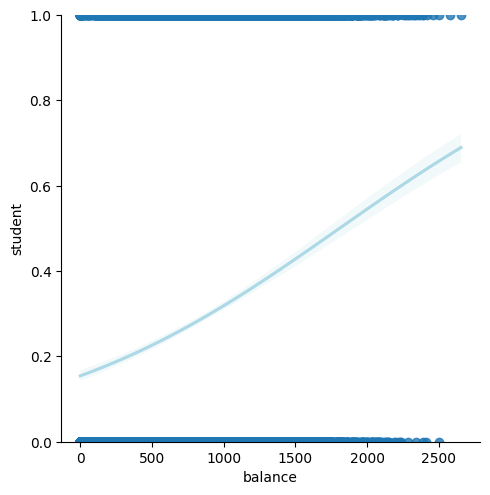

In [ ]:
# @title Lmplot for Logistics Regression

## Grafico valores para poder identificar distr
sns.lmplot(x=x,
           y=y,
           data=df2,
           ci=95,
           logistic=True,
           line_kws={'color': 'lightblue'})

## Seteo los limites del eje Y
plt.ylim(0, 1)

## Muestro mi gráfico
plt.show()

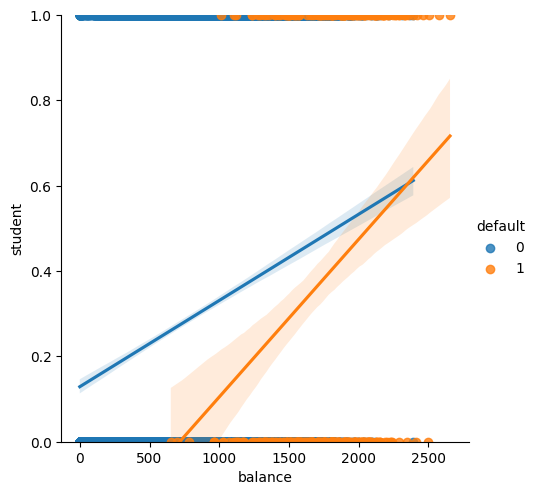

In [ ]:
# @title Lmplot with logistics regression and open by "default"

## Selecciono la variable por la que aperturar mi regresión.
segmento = "default"

## Grafico regresion logistica aperturando por segmento
sns.lmplot(x=x,
           y=y,
           hue=segmento,
           data=df2)

## Seteo los limites del eje Y
plt.ylim(0, 1)

## Muestro el gráfico
plt.show()

## 3. Regresion Polinómica
La función polynomial_regression realiza una regresión polinómica entre dos variables en el dataframe df y muestra los coeficientes del polinomio y el coeficiente de determinación (R-squared). También se genera un gráfico de dispersión con el polinomio de regresión. Es importante tener en cuenta que esta regresión asume que la relación entre las dos variables sigue un patrón polinómico.

In [ ]:
# @title Add more libreries
## Regresion
import scipy.stats as stats

In [ ]:
# @title Libraries
## DataFrames & Statistics
df3 = pd.read_csv('https://www.dropbox.com/s/4jgheggd1dak5pw/data_visualization.csv?raw=1', index_col=0)
df3['args'] = np.random.choice([0, 1],size=len(df.index))
df3.head()

,arrow,under,interior,theta,amb,slice,delta,pi,height,nu,night,dataset,length,twi,x,wind,y,rho,alpha,args
0,5718.086525,-1.614321,1.555158e+11,11213.081938,95.426020,7425.427256,-10.406357,9680.358706,7.120126e+06,1.546267e+07,7.240413,9850.207734,0.743258,1490.775204,9.659253,9175.438093,-6.254395,1.291731e+23,437.103839,1
1,3230.167947,0.066989,1.853956e+12,21130.628512,12.420615,12649.208494,-115.874083,8052.298378,2.075786e+07,4.522003e+06,10.999659,10969.549522,-0.553688,838.891244,9.635378,5166.583785,-88.489405,9.618581e+21,307.629683,0
2,7557.771756,-0.067705,8.501664e+10,13804.152665,152.939420,9134.779756,-30.421137,1246.712864,1.078952e+07,6.069516e+06,11.991673,4253.498794,-0.201762,462.904173,10.522631,12130.240191,-36.244784,3.233375e+19,400.425188,0
3,6555.190363,-1.253076,1.194396e+12,7549.844014,457.351838,2475.142419,-129.555563,5177.525187,7.995510e+05,2.238686e+07,11.507596,5478.190397,-0.153284,361.526737,10.371287,10540.522103,-67.820561,2.021548e+22,671.267621,1
4,3201.371780,0.327282,5.787566e+11,32745.773149,228.577117,1545.254659,-101.958575,14579.206899,3.122909e+05,5.824294e+07,8.458106,6334.157647,0.213162,677.949043,11.476100,5132.024696,-42.244775,9.174238e+19,491.662760,0


In [ ]:
# @title Set auxiliaries variables
x = 'height'
y = 'slice'
X_data = df3[x]
y_data = df3[y]
degree = 2

In [ ]:
# @title Polynomial Regression
coefs = np.polyfit(X_data, y_data, degree)
print("Coefficients: ", coefs)

Coefficients:  [-1.91648355e-11  9.27685343e-04  1.58920186e+03]


In [ ]:
# @title R Squared
r_squared = stats.pearsonr(np.polyval(coefs, X_data), y_data)[0] ** 2
print("R-squared: ", r_squared)

R-squared:  0.9844869652076067


#### Interpretemos juntos los datos de la regresión polinómica

1. Coefficients (Coeficientes):
> * El primer coeficiente (-1.91648355e-11) corresponde al término de grado más alto en el modelo de regresión polinómica.
* El segundo coeficiente (9.27685343e-04) corresponde al término de grado 1 (lineal).
* El tercer coeficiente (1.58920186e+03) corresponde al término independiente (intercepto) o término de grado 0.

**Estos coeficientes representan cómo se ajusta la curva polinómica a los datos. En este caso, se trata de un polinomio de tercer grado, ya que hay tres coeficientes.**

2. R-squared (R-cuadrado):
> * El valor de R-cuadrado es 0.9845, lo que indica que aproximadamente el 98.45% de la variabilidad en la variable dependiente (la que estás tratando de predecir) se explica por el modelo de regresión polinómica.
* Un R-cuadrado alto sugiere que el modelo se ajusta muy bien a los datos y que la curva polinómica captura la mayoría de la variabilidad en la variable dependiente.

**En resumen, estos resultados indican que el modelo de regresión polinómica se ajusta muy bien a los datos. Los coeficientes indican la forma específica de la curva polinómica, y el alto valor de R-cuadrado sugiere que el modelo explica la gran mayoría de la variabilidad en la variable dependiente. Esto implica que la regresión polinómica es una representación efectiva de la relación entre las columnas seleccionadas**

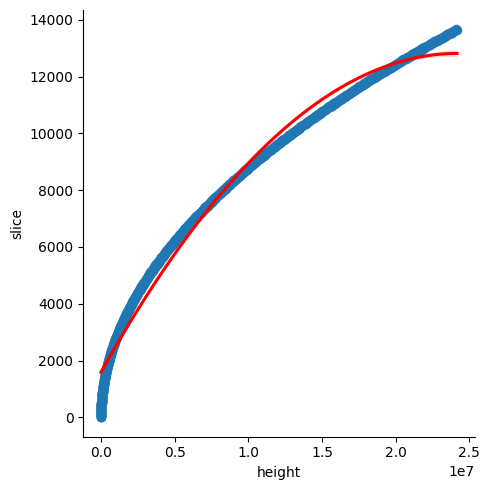

In [ ]:
# @title Lmplot for polinomic regression

#Grafico regresion polinomica aperturando por segmento
sns.lmplot(x=x,
           y=y,
           data=df3,
           order=degree,
           line_kws={'color': 'red'})

## Mostramos el gráfico
plt.show()

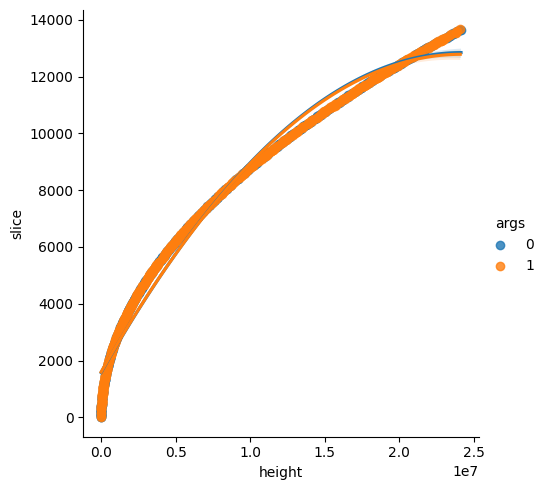

In [ ]:
# @title Lmplot with polinomic regression and open by "args"

## Selecciono la variable por la que aperturar mi regresión.
segmento = "args"

## Armo mi lmplot
sns.lmplot(x=x,
           y=y,
           data=df,
           order=degree,
           hue=segmento,
           ci=95)

## Muestro mi gráfico
plt.show()

## Challenges:

1. En lugar de utilizar la columna "height" como variable independiente en la regresión lineal, intenta utilizar otra columna del DataFrame como variable independiente y realiza el mismo análisis de regresión lineal. ¿Cómo cambian los resultados?
2. En lugar de utilizar la columna "student" como variable dependiente en la regresión logística, elige "default" y realiza una regresión logística con respecto a esa variable. ¿Cómo se relaciona la probabilidad logarítmica con la nueva variable?
3. Experimenta con diferentes grados de polinomio (por ejemplo 3 y 4) al realizar una regresión polinómica en lugar de usar el grado 2 como en el ejemplo de esta lección. ¿Cómo cambian los coeficientes y el R-cuadrado a medida que aumentas el grado?